# In this example, we perform model discovery on an active nematics dataset generated from numerical simulations.

## This dataset contains a trajectory of an active nematic which has developed turbulence. This data includes the $Q_{xx}$, $Q_{xy}$, $u_x$ and $u_y$ values at all points in space and time.

### Methods are as described in the manuscript: https://arxiv.org/abs/2202.12854

### Analysis includes:

* Using the integral formulation to obtain the optimal model for the Qxx, Qxy and vorticity equations in the presence of 5% noise. We will note here that the vorticity equations has a bad R-squared score.
* Using the weak formulation to obtain the optimal flow equation with a much better R-squared score. 
* Performing a strong form check of the obtained equation by computing the terms and making a spatial comparison.

### Importing essential modules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gdown

### Importing actnempy modules. The core object for model identification is called `Anise`, short for Active Nematic Identification of Sparse Equations

In [2]:
from actnempy import utils as ut
from actnempy.SINDy import Benchmark

### `Benchmark` is a subclass of `Anise`, containing essentially the same methods as `Anise`, with additional benchmarking methods like noise addition that will be useful to test on simulation data. Both these classes are initialized with the path to the data directory. 

This directory must contain the following files:

* `processed_data.npz`: A single .npz file containing 4 arrays: `Qxx_all`, `Qxy_all`, `u_all` and `v_all`, each of dimensions (NX, NY, NT), with X-Y being the spatial dimensions and T being the time dimension. The preprocessing of the experimental / simulation data into this format is done elsewhere. (Due to the large size, I am not uploading a sample processed data file here, but I will happily share it with you if you reach out to me at chaitanya@brandeis.edu!)
* `metadata.json` : A json file containing three keys: 'dx', 'dy' and 'dt', specifying the spatial and temoral discretization of the data.
* `sindy_library_specs.json`: A json file specifying the parameters for the integral formulation, such as maximum function order / derivative order for various terms, as well as number of windows and window size. An example json file is already provided under `../TestData/`

In [3]:
an = Benchmark("../TestData")


Loading all the data...
Data loaded. Dimensions: (64, 64, 499)


### We will now visualize the first frame of the dataset

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


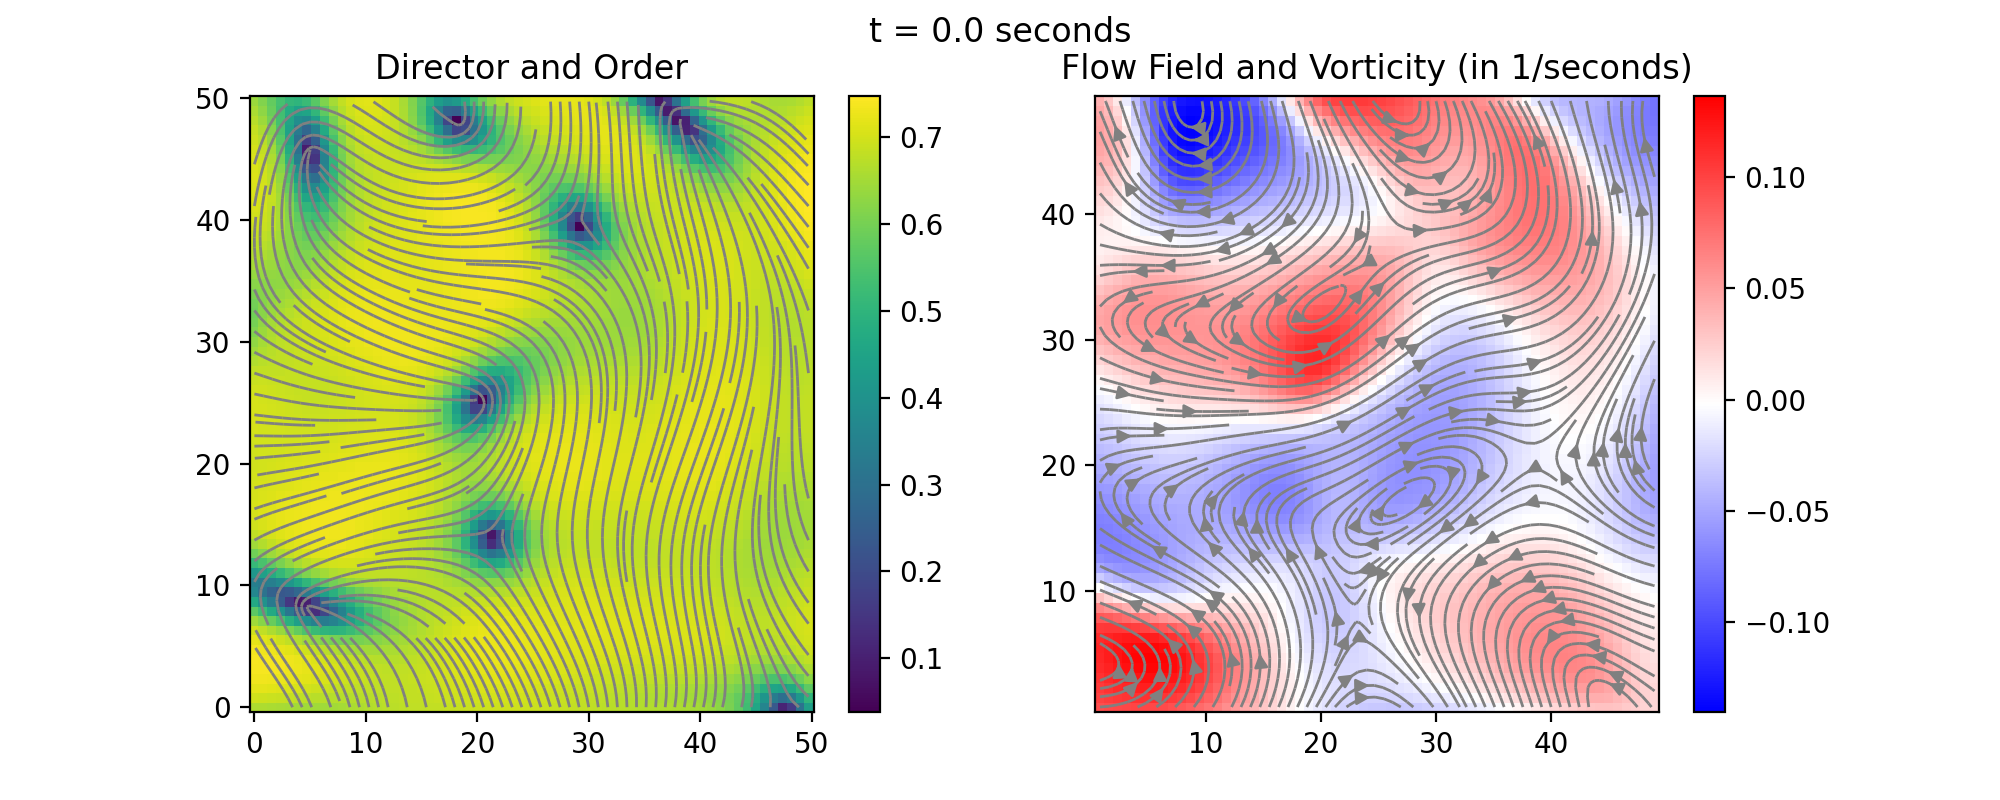

In [5]:
an.visualize(1, save=False)

### Let's now add some noise to the dataset as a test for our algorithm

In [6]:
an.add_noise_all(0.05)

### Let's visualize our noisy fields

<IPython.core.display.Javascript object>


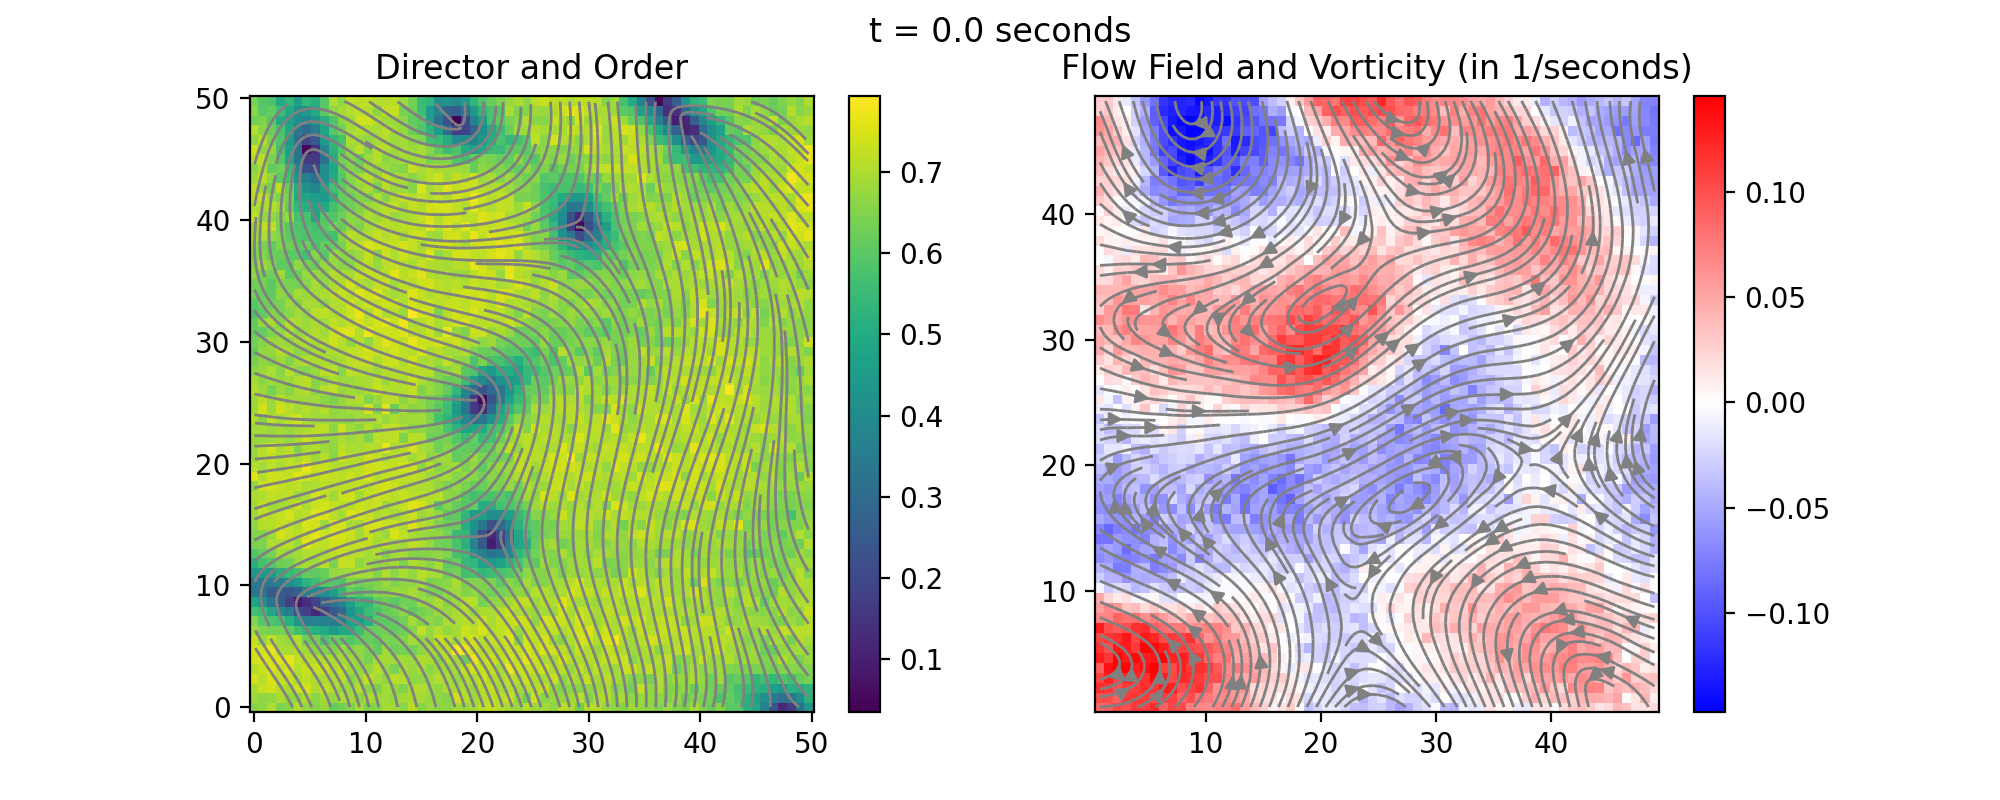

In [7]:
an.visualize(1, save=False)

### Now, we will apply the integral formulation to this dataset. The `sindy_int` method performs this operation on `Qxx`, `Qxy` and `ω` in one fell swoop.

As a reference, the equations used for the simulation in this dataset are:

For the Q-tensor:
$$
    \partial_t \mathbf{Q} + \nabla\cdot(\mathbf{u}\mathbf{Q}) + (\mathbf{\Omega}\cdot\mathbf{Q} - \mathbf{Q}\cdot\mathbf{\Omega})  =
    \lambda \mathbf{E} + \mathbf{H}
$$

with 

$$
    \Omega_{ij} = \frac{1}{2}(\partial_i u_j - \partial_j u_i) 
$$
$$
    E_{ij} = \frac{1}{2}(\partial_i u_j + \partial_j u_i)
$$
$$
    H_{ij} = (-a_2-a_4 Q_{kl}Q_{lk}) Q_{ij} + K \partial_k \partial_k Q_{ij}
$$

and for the Stokes equation for the flow:
$$
\eta\nabla^2 \mathbf{u} = \nabla P + \Gamma \mathbf{u} + \alpha \nabla\cdot \mathbf{Q}
$$

The parameters used in the simulation are 
#### $\eta = K = 1$, 
#### $\alpha = 0.3$
#### $\Gamma = 0.03$
#### $a_2 = -0.3$
#### and
#### $a_4 = 1.36$

In [8]:
an.sindy_int()

Generating libraries...
Computing derivatives at selected points...
Computing the PDE for Qxx...
k is too large for the amount of data present...
Switching to k=4
Optimal model: 
R2 score: 0.9781871054990179
Contains 10/246 terms...
(∂Qxx/∂t) =   (-0.983988) u × (∂Qxx/∂x)
            + (-0.980515) v × (∂Qxx/∂y)
            + (-2.46581) Qxx × Qxx × Qxx
            + (-2.47309) Qxx × Qxy × Qxy
            + (0.273372) Qxx
            + (-0.98127) Qxy × (∂v/∂x)
            + (0.978448) Qxy × (∂u/∂y)
            + (0.944058) (∂u/∂x)
            + (0.980425) (∂²Qxx/∂x²)
            + (0.973282) (∂²Qxx/∂y²)
   
Done! Stored under pde_Qxx.

Computing the PDE for Qxy...
k is too large for the amount of data present...
Switching to k=4
Optimal model: 
R2 score: 0.9818955025271967
Contains 11/246 terms...
(∂Qxy/∂t) =   (-0.974203) u × (∂Qxy/∂x)
            + (-0.974746) v × (∂Qxy/∂y)
            + (-2.39875) Qxx × Qxx × Qxy
            + (0.98796) Qxx × (∂v/∂x)
            + (-0.958556) Qxx × (∂

### The SINDy operation produces a `PDE` object, one for each equation, `pde_Qxx`, `pde_Qxy` and `pde_St`. This object has some convenient functionality to analyze the result. 

#### Let's plot the optimality curve for `Qxx` for upto 30 terms using the `plot_fvu` method on the PDE

<IPython.core.display.Javascript object>


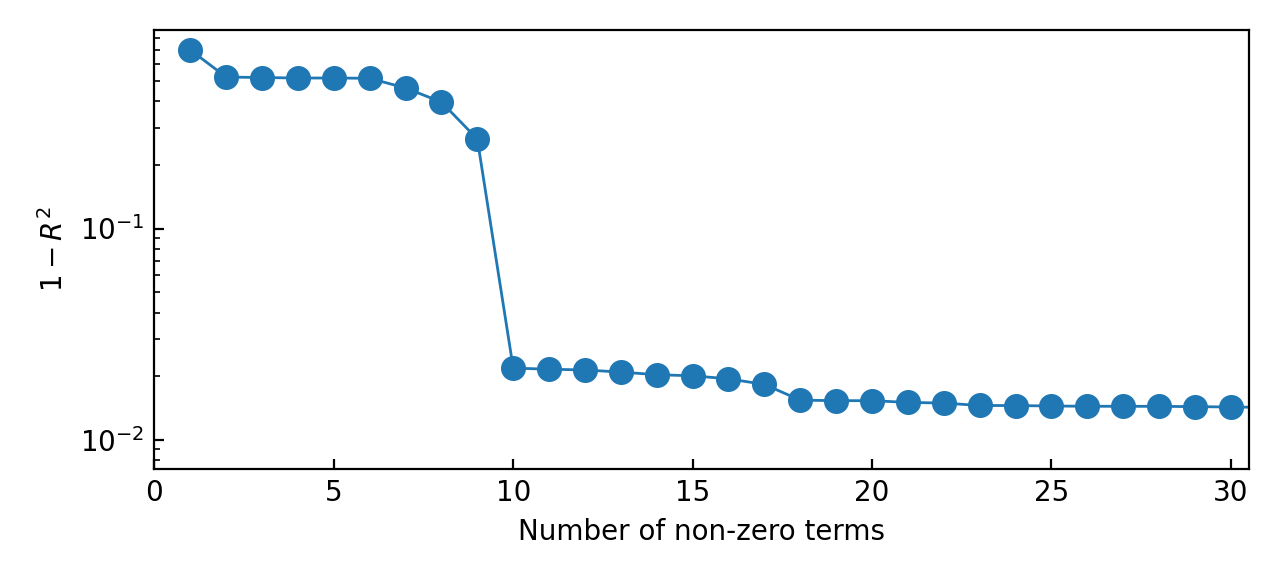

In [9]:
an.pde_Qxx.plot_fvu(30)

#### We clearly see a steep shoulder at n=10, as is indicated in the result from `sindy_int`. We can display the model at any `n` using the `display_model` method

In [10]:
an.pde_Qxx.display_model(10)

R2 score: 0.9781871054990179
Contains 10/246 terms...
(∂Qxx/∂t) =   (-0.983988) u × (∂Qxx/∂x)
            + (-0.980515) v × (∂Qxx/∂y)
            + (-2.46581) Qxx × Qxx × Qxx
            + (-2.47309) Qxx × Qxy × Qxy
            + (0.273372) Qxx
            + (-0.98127) Qxy × (∂v/∂x)
            + (0.978448) Qxy × (∂u/∂y)
            + (0.944058) (∂u/∂x)
            + (0.980425) (∂²Qxx/∂x²)
            + (0.973282) (∂²Qxx/∂y²)
   


### While the `Qxx` and `Qxy` results are good despite the noise, the flow equation is inaccurate. The $\alpha$ value is off by ~30% and the substrate friction term is absent.

### We will now use the weak form for the flow equation with a large window size.

In [11]:
an.weak_form(num_windows=50, window_size=(45,45,101))

100%|████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 27.03it/s]


k is too large for the amount of data present...
Switching to k=8
Optimal model: 
R2 score: 0.9995582233665518
Contains 2/6 terms...
∇²u =   (0.28761) ∇·Q
      + (0.0275669) u
   
Done! Stored under pde_St_w.



### This gives a much better result than the integral formulation!

<IPython.core.display.Javascript object>


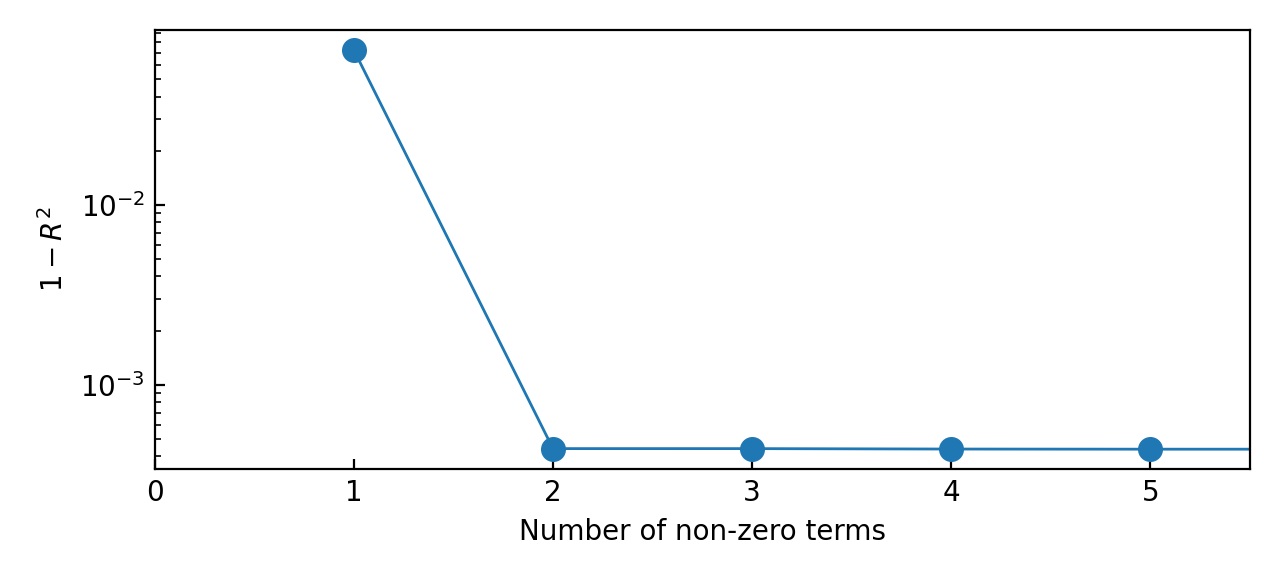

In [12]:
an.pde_St_w.plot_fvu(5)

### A convenient method called `hierarchy` provides the terms in the decreasing order of prominence

In [13]:
an.pde_St_w.hierarchy()

['∇·Q', 'u', '(∂u/∂t)', 'Q·∇·Q', 'u(∇.u)', 'u.∇u']

### We now compute the correlation between $\nabla\times\nabla\cdot Q$ and $\nabla\times \nabla^2 \vec{u}$ to test whether the equation obtained using weak form holds in the strong form

In [14]:
from tqdm import tqdm 
from scipy.ndimage import gaussian_filter

ns = 0.04 # Noise strength
def spatialcorr(a, b):
    ab = a * b
    return np.sum(ab) / np.sqrt(np.sum(a**2) * np.sum(b**2))

average = lambda f : gaussian_filter(f, sigma=3)

### Note above the value of `sigma` used for the averaging filter. Lowering this value will result in a much larger error in $\nabla\times \nabla^2 \vec{u}$ due to the 3 derivatives.

100%|█████████████████████████████████████████████████████████████| 499/499 [00:00<00:00, 983.92it/s]


<IPython.core.display.Javascript object>


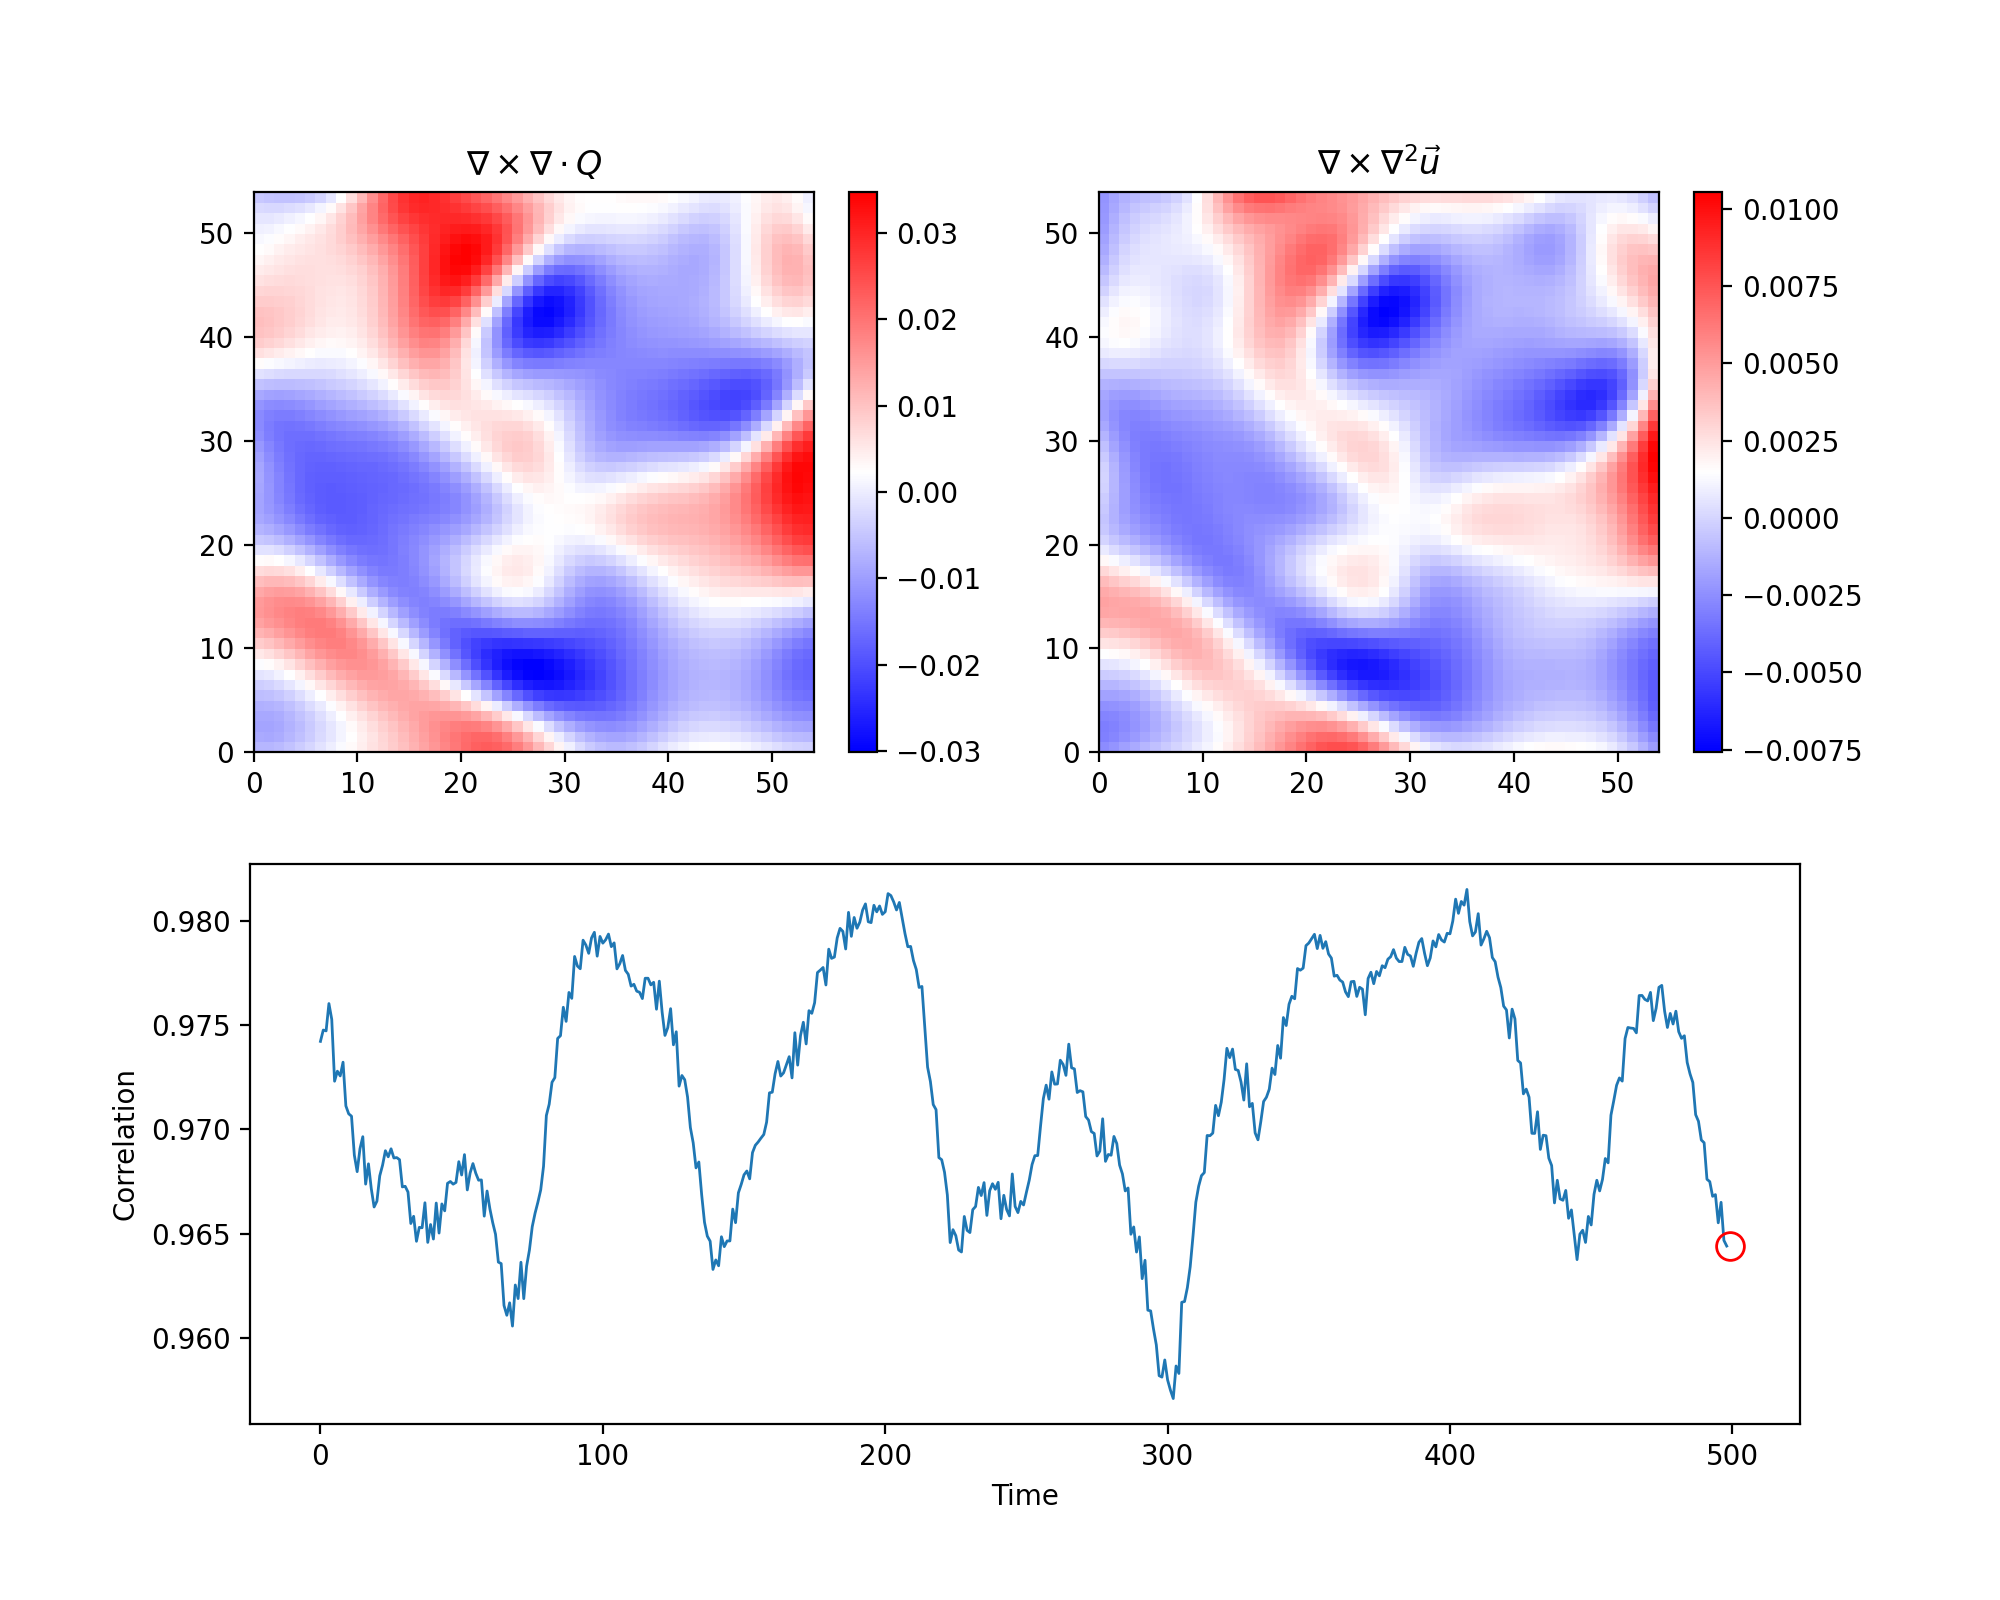

In [15]:
NT = an.NT
corrs = np.zeros(NT)
for i in tqdm(range(NT)):
    Qxx = an.Qxx_all[:,:,i]
    Qxy = an.Qxy_all[:,:,i]
    
    Qxx = average(Qxx)
    Qxy = average(Qxy)
    
    Q = np.array([[Qxx, Qxy], [Qxy, -Qxx]])
    grid2D = an.grid2D

    divQ = grid2D.div(Q)
    curl_divQ = grid2D.curl(divQ)

    u = an.u_all[:,:,i]
    v = an.v_all[:,:,i]
    
    u = average(u)
    v = average(v)
    
    vel = np.array([u, v])
    lap_vel = grid2D.lap(vel)
    curl_lap_vel = grid2D.curl(lap_vel)

    skip = 5 # Number of pixels to remove from the sides due to inaccuracy of derivatives at the boundary
    left = curl_divQ[skip:-skip,skip:-skip]
    right = curl_lap_vel[skip:-skip,skip:-skip]
    
    corrs[i] = spatialcorr(left, right)


figure_mosaic = """
                AB
                CC
                """
fig, ax = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10,8),facecolor="white")

plt.sca(ax["A"])
plt.pcolor(left, cmap="bwr")
ax["A"].set_aspect("equal")
plt.title(r"$\nabla\times\nabla\cdot Q$")
plt.colorbar()
plt.sca(ax["B"])
plt.pcolor(right, cmap="bwr")
ax["B"].set_aspect("equal")
plt.title(r"$\nabla\times \nabla^2 \vec{u}$")
plt.colorbar()
plt.sca(ax["C"])
plt.plot(corrs)
plt.plot(NT, corrs[-1], 'o', color='red', markersize=10, fillstyle="none")
plt.xlabel("Time")
plt.ylabel("Correlation")
# plt.suptitle("")
# plt.suptitle(f"{c} " + r"$\mu$" + "M ATP")
plt.show()